<a href="https://colab.research.google.com/github/m5532m5532/hw2_M10921008/blob/main/%E4%BD%9C%E6%A5%AD%E4%BA%8C_concrete_%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/colab/Colab Notebooks/Concrete_Data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


##資料前處理

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split

In [ ]:
df_7 = pd.read_csv("/content/drive/My Drive/colab/Colab Notebooks/Concrete_Data.csv")
df_7

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
# normalize 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_8 = scaler.fit_transform(df_7)
df_9 = pd.DataFrame(df_8,columns=df_7.columns)
df_9

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,0.522860
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,0.359412
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,0.266226
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,0.379220


In [ ]:
df_9.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409059,0.205609,0.270806,0.477374,0.192691,0.499764,0.450528,0.122698,0.417191
std,0.238599,0.240065,0.319825,0.170561,0.185523,0.226029,0.201144,0.173544,0.208119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.344249,0.000000,0.380814,0.343578,0.016484,0.266351
50%,0.390183,0.061213,0.000000,0.504792,0.198758,0.485465,0.465379,0.074176,0.400087
75%,0.566210,0.397746,0.591204,0.560703,0.316770,0.663953,0.577020,0.151099,0.545721
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df_9.drop('Concrete compressive strength', axis=1)
y = df_9['Concrete compressive strength']

##訓練

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# 建立 random forest 模型
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(train_X, train_y)
# 預測
train_y_predicted = rf.predict(train_X)

In [ ]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train),rf.oob_score_,rf.score(X_train, y_train)))

R^2 Training Score: 0.99 
OOB Score: 0.92 
R^2 Validation Score: 0.99


In [ ]:
rf.feature_importances_

array([0.33068617, 0.07848992, 0.01702561, 0.10774243, 0.0645112 ,
       0.02737497, 0.03845254, 0.33571716])

In [ ]:
df_feature=train_X.columns
df_important = pd.DataFrame(index=df_feature)
df_important['values'] = rf.feature_importances_

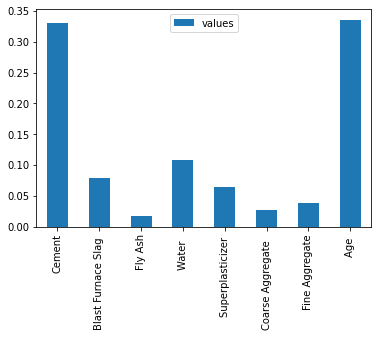

In [ ]:
df_important.plot.bar()

In [ ]:
preds_test = rf.predict(X_test)

##預測

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE为：',np.sqrt(mean_squared_error(y_test,preds_test)))

RMSE为： 0.02418748698380341


In [ ]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
print('MAPE为：',mean_squared_error(y_test,preds_test))

MAPE为： 0.0005850345265916594
